In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
data = load_iris()

X = data.data
y = data.target
target_names = data.target_names

print("Original Data Shape:", X.shape)


Original Data Shape: (150, 4)


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)


In [15]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_normalized = minmax.fit_transform(X)


In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)


In [30]:
print("\nExplained Variance Ratio:")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"Principal Component {i+4}: {var:.6f}")

print("\nCumulative Explained Variance:", np.cumsum(pca.explained_variance_ratio_))



Explained Variance Ratio:
Principal Component 4: 0.729624
Principal Component 5: 0.228508

Cumulative Explained Variance: [0.72962445 0.95813207]


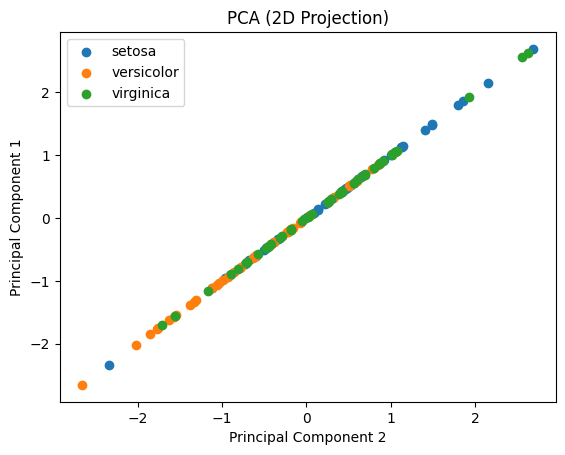

In [39]:
import matplotlib.pyplot as plt

plt.figure()

for i, target in enumerate(target_names):
    plt.scatter(
        X_pca[y == i, 1],
        X_pca[y == i, 1],
        label=target
    )

plt.ylabel("Principal Component 1")
plt.xlabel("Principal Component 2")
plt.title("PCA (2D Projection)")
plt.legend()
plt.show()


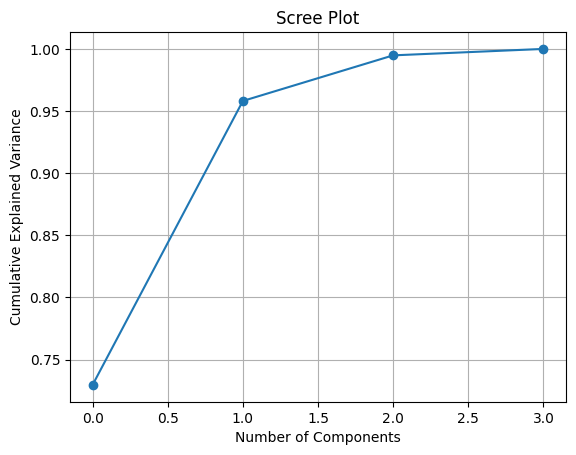

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca_full = PCA()
pca_full.fit(X_standardized)

plt.figure()
plt.plot(
    np.cumsum(pca_full.explained_variance_ratio_),
    marker='o'
)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()


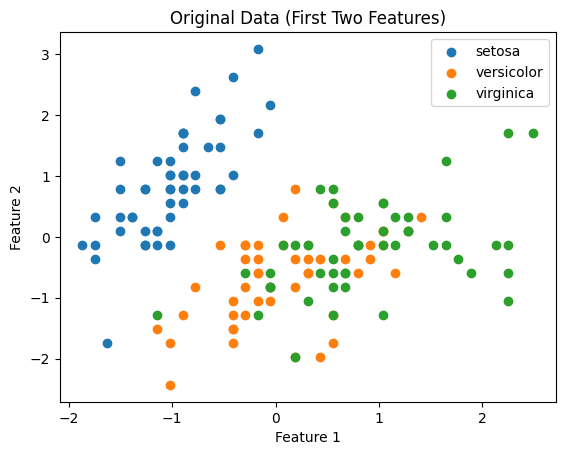

In [20]:
plt.figure()

for i, target in enumerate(target_names):
    plt.scatter(
        X_standardized[y == i, 0],
        X_standardized[y == i, 1],
        label=target
    )

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data (First Two Features)")
plt.legend()
plt.show()


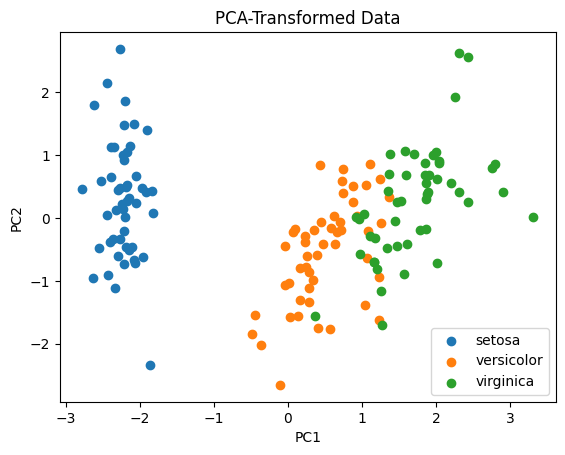

In [21]:
plt.figure()

for i, target in enumerate(target_names):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        label=target
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA-Transformed Data")
plt.legend()
plt.show()

